# Animal Bites
This data set is going to answer:
<ol>
<li>how frequent are animal bites?</li>
<li>What percentage of bites are by dogs?</li>
<li>Has the number of dog bites increased since 1985?</li>
</ol>
 



# Loading and visualizing the raw data

In [1]:
import pandas as pd

df = pd.read_csv('Health_animalBites2.csv')

In [2]:
df.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


In [3]:
import pandas_profiling

In [4]:
#report = df.profile_report(sort='None', html={'style':{'full_width': True}}, progress_bar=False)
#report

In [5]:
df.drop_duplicates(inplace=True)

Things that appear to not be helpful: AdvIssueYNDesc, head_sent_date, release_date,  DispositionIDDesc, quarantine_date. These are missing a lot of data and do not seem helpful to answer the questions. 

In [6]:
df.drop(['AdvIssuedYNDesc', 'head_sent_date', 'release_date', 'DispositionIDDesc', 'quarantine_date'], axis=1, inplace =True)

The data is missing ~1.3% of the data for species. I am going to drop this data and the 'Other' category as I want specifics and there are only 11 entries of 'Other'

In [7]:
df['SpeciesIDDesc'].unique()

array(['DOG', 'CAT', 'BAT', 'RACCOON', 'OTHER', 'RABBIT', nan, 'HORSE',
       'SKUNK', 'FERRET'], dtype=object)

In [8]:
df = df[df['SpeciesIDDesc'] != 'OTHER']

In [9]:
import numpy as np

In [10]:
df.dropna(subset = ['SpeciesIDDesc'],inplace=True)

In [11]:
df['SpeciesIDDesc'].unique()

array(['DOG', 'CAT', 'BAT', 'RACCOON', 'RABBIT', 'HORSE', 'SKUNK',
       'FERRET'], dtype=object)

In [12]:
df.dropna(subset = ['bite_date'],inplace=True)

In [13]:
df['GenderIDDesc'].fillna('MALE',inplace=True)

In [14]:
df['GenderIDDesc'].replace({'UNKNOWN':'MALE'},inplace=True)

In [15]:
report = df.profile_report(sort='None', html={'style':{'full_width': True}}, progress_bar=False)
report

In [16]:
df.fillna(0, inplace =True)

In [17]:
df.isnull().sum()

bite_date            0
SpeciesIDDesc        0
BreedIDDesc          0
GenderIDDesc         0
color                0
vaccination_yrs      0
vaccination_date     0
victim_zip           0
WhereBittenIDDesc    0
ResultsIDDesc        0
dtype: int64

## Exploring the Data

Here I am going to explore the data and possibly answer the above questions.

In [18]:
animals = df['SpeciesIDDesc'].value_counts()

In [19]:
animals

DOG        6910
CAT        1530
BAT          76
RACCOON      21
HORSE         5
FERRET        4
RABBIT        3
SKUNK         1
Name: SpeciesIDDesc, dtype: int64

In [20]:
total_animals = 8550

In [21]:
animals=animals.to_dict()

In [22]:
animals

{'DOG': 6910,
 'CAT': 1530,
 'BAT': 76,
 'RACCOON': 21,
 'HORSE': 5,
 'FERRET': 4,
 'RABBIT': 3,
 'SKUNK': 1}

In [62]:
animals = {'DOG': 6932,'CAT': 1535,'OTHER':110}

In [63]:
pct_animals = {k: round(v/8550*100,2) for (k,v) in animals.items()}

In [64]:
pct_animals

{'DOG': 81.08, 'CAT': 17.95, 'OTHER': 1.29}

In [65]:
pct_animals.values()

dict_values([81.08, 17.95, 1.29])

In [66]:
from matplotlib import pyplot as plt 

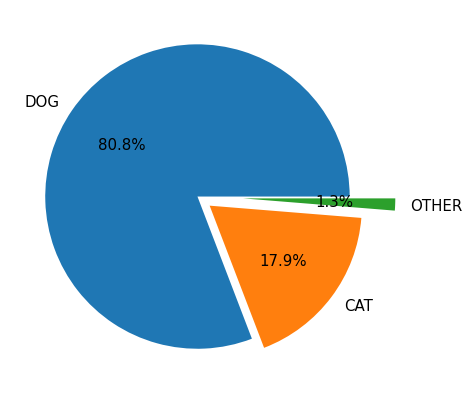

In [70]:
fig = plt.figure(figsize =(10, 7))
explode = (0.0, 0.1, 0.3)
plt.rcParams['font.size'] = 15.0
plt.pie(list(animals.values()), explode = explode,labels = list(animals.keys()),autopct='%1.1f%%')
plt.savefig('animals.png')

Above shows that dogs by far accounted for the highest number of animal bites, followed by cats. The other animals accounted together to be less than 2% of the total animal bites recorded. 

In [29]:
df.dtypes

bite_date             object
SpeciesIDDesc         object
BreedIDDesc           object
GenderIDDesc          object
color                 object
vaccination_yrs      float64
vaccination_date      object
victim_zip            object
WhereBittenIDDesc     object
ResultsIDDesc         object
dtype: object

In [30]:
df.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,WhereBittenIDDesc,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,0,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,BODY,UNKNOWN
1,1986-02-12 00:00:00,DOG,0,MALE,BRO & BLA,0.0,0,40218,BODY,UNKNOWN
2,1987-05-07 00:00:00,DOG,0,MALE,0,0.0,0,40219,BODY,UNKNOWN
3,1988-10-02 00:00:00,DOG,0,MALE,BLA & BRO,0.0,0,0,BODY,UNKNOWN
4,1989-08-29 00:00:00,DOG,0,FEMALE,BLK-WHT,0.0,0,0,BODY,UNKNOWN


In [31]:
dates = list(df['bite_date'])

In [32]:
dates = [x[0:4] for x in dates]

In [33]:
df['bite_date'] = dates

In [34]:
bite_years = df['bite_date'].value_counts()

In [35]:
df.dtypes

bite_date             object
SpeciesIDDesc         object
BreedIDDesc           object
GenderIDDesc          object
color                 object
vaccination_yrs      float64
vaccination_date      object
victim_zip            object
WhereBittenIDDesc     object
ResultsIDDesc         object
dtype: object

In [36]:
pd.to_numeric(df['bite_date'])

0       1985
1       1986
2       1987
3       1988
4       1989
        ... 
8998    2017
8999    2017
9000    2017
9001    2017
9002    2017
Name: bite_date, Length: 8550, dtype: int64

In [37]:
bite_years

2014    1153
2011    1140
2013    1129
2010    1128
2012    1120
2016    1045
2015     976
2017     792
2009      14
1992      10
1994       7
1990       6
1993       6
1991       5
2001       4
1989       2
1952       2
1985       1
1995       1
1987       1
2007       1
1988       1
2021       1
2002       1
1986       1
1999       1
2020       1
2018       1
Name: bite_date, dtype: int64

In [38]:
bite_years.to_dict()

{'2014': 1153,
 '2011': 1140,
 '2013': 1129,
 '2010': 1128,
 '2012': 1120,
 '2016': 1045,
 '2015': 976,
 '2017': 792,
 '2009': 14,
 '1992': 10,
 '1994': 7,
 '1990': 6,
 '1993': 6,
 '1991': 5,
 '2001': 4,
 '1989': 2,
 '1952': 2,
 '1985': 1,
 '1995': 1,
 '1987': 1,
 '2007': 1,
 '1988': 1,
 '2021': 1,
 '2002': 1,
 '1986': 1,
 '1999': 1,
 '2020': 1,
 '2018': 1}

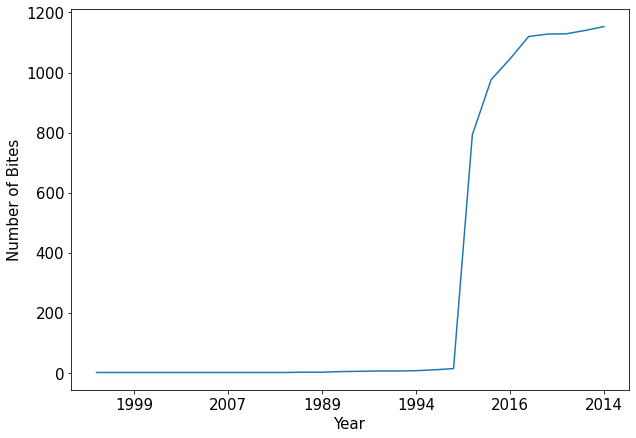

In [73]:
plt.figure(figsize =(10, 7))
bite_years.plot().invert_xaxis()
plt.xlabel('Year')
plt.ylabel('Number of Bites')
plt.savefig('numberofbites.png')

The number of instances of bites have increased with time. 

In [40]:
popdf = pd.read_csv('Louisville-population-2021-03-21.csv')

In [41]:
popdf.head()

,date,Population,Annual Change
0,1950-12-31,476000,NaN
1,1951-12-31,488000,2.52
2,1952-12-31,500000,2.46
3,1953-12-31,513000,2.60
4,1954-12-31,526000,2.53


In [42]:
popdf.columns

Index(['date', ' Population', ' Annual Change'], dtype='object')

In [43]:
dates2 = popdf['date']
dates2 = [int(x[0:4]) for x in dates2]

In [44]:
popdf['date']=dates2

In [45]:
popdf.drop([' Annual Change'],axis=1, inplace =True)

In [46]:
popdf = popdf.iloc[35:71]

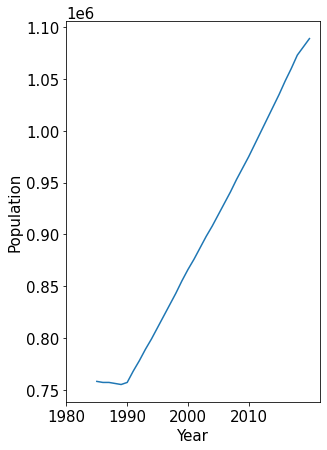

In [81]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(121)
ax.plot(popdf['date'],popdf[' Population'])
ax.xaxis.set_ticks(np.arange(1980, 2020, 10))
plt.xlabel('Year')
plt.ylabel('Population')
plt.savefig('population.png')

As shown in the graph above the poplutaion of Louisville began to increase rapidly around 1990. The number of dog bites recorded also increased drastically around 1994. With the increase in population, there was probably an increase in the number os

In [48]:
dogs = df[df['SpeciesIDDesc']=='DOG']

In [49]:
dogbites = dogs['bite_date'].value_counts()

In [50]:
dogbites

2014    940
2012    922
2011    904
2013    900
2010    892
2016    847
2015    789
2017    656
2009     12
1992      9
1994      7
1990      6
1991      5
1993      5
2001      3
1989      2
1952      2
1985      1
1995      1
1987      1
2021      1
2002      1
1988      1
1986      1
1999      1
2018      1
Name: bite_date, dtype: int64

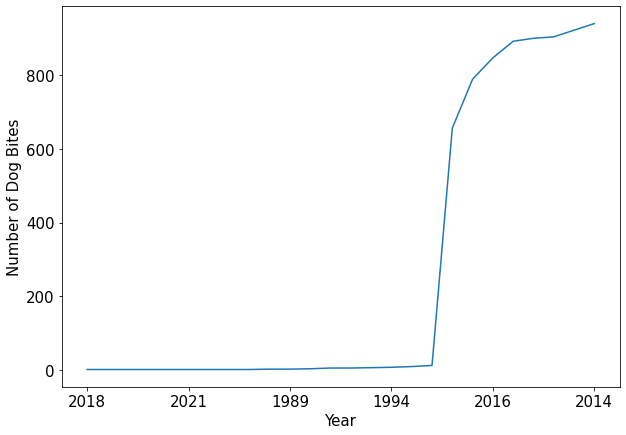

In [74]:
plt.figure(figsize =(10, 7))
dogbites.plot().invert_xaxis()
plt.xlabel('Year')
plt.ylabel('Number of Dog Bites')
plt.savefig('numberofdogbites.png')

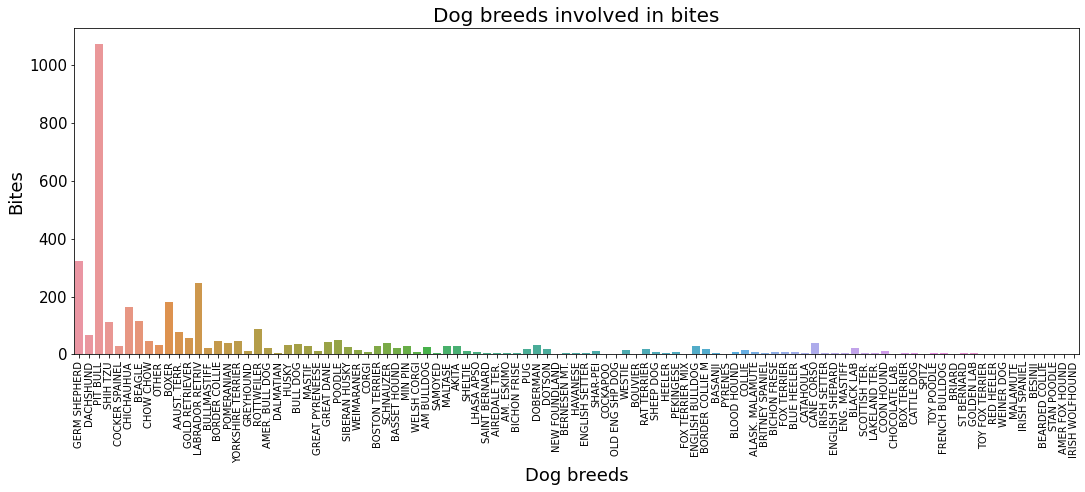

In [84]:
import seaborn as sns
dog_breeds = df.where(df['SpeciesIDDesc'] == "DOG")
dog_breeds = dog_breeds[dog_breeds['BreedIDDesc'] != 0]

plt.figure(figsize=(18,6))
sns.countplot(dog_breeds['BreedIDDesc'])
plt.title("Dog breeds involved in bites", fontsize=20)
plt.xlabel('Dog breeds', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=10, rotation=90)
plt.show()

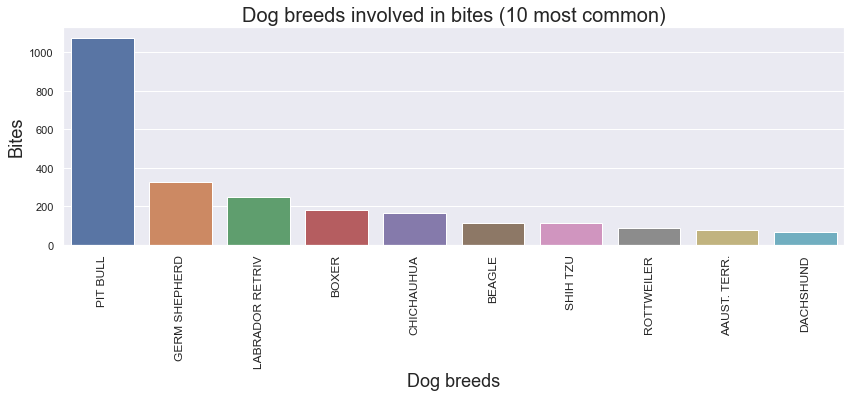

<Figure size 432x288 with 0 Axes>

In [88]:
plt.figure(figsize=(14,4))
sns.set()
sns.countplot(dog_breeds['BreedIDDesc'], order = dog_breeds['BreedIDDesc'].value_counts().iloc[0:10].index)
plt.title("Dog breeds involved in bites (10 most common)", fontsize=20)
plt.xlabel('Dog breeds', fontsize=18)
plt.ylabel('Bites', fontsize=18)
plt.xticks(fontsize=12, rotation=90)
plt.show()
plt.savefig('dogbreeds.png')